In [1]:
import pandas as pd # type: ignore
import numpy as np# type: ignore
import seaborn as sns# type: ignore
import matplotlib.pyplot as plt# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor# type: ignore
from sklearn.metrics import accuracy_score, precision_score# type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score# type: ignore
from pandas_profiling import ProfileReport# type: ignore

ModuleNotFoundError: No module named 'seaborn'

In [22]:
# Load the dataset
data = pd.read_csv("C:/Users/lenovo/Desktop/SEM4/Project III/Project_Placemeant/finaldata.csv")

# Take a random sample of 20,000 students
sample_data = data.sample(n=20000, random_state=42)

In [23]:
sample_data.head()

,Student Name,Skillset,Placement Status,CPI,Salary offered,Company Offered
40195,Student_40195,"PostgreSQL, C#, Kubernetes, PyTorch",Not Placed,5.552795,0.0,No Company
62864,Student_62864,"C++, C#",Not Placed,5.692687,0.0,No Company
1956,Student_1956,"HTML/CSS, Angular",Placed,5.873957,635573.0,L&T Infotech
55190,Student_55190,"PyTorch, MySQL, HTML/CSS, Python, AWS",Not Placed,7.269796,0.0,No Company
41937,Student_41937,"MongoDB, Angular",Placed,6.612462,581193.0,Mphasis


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


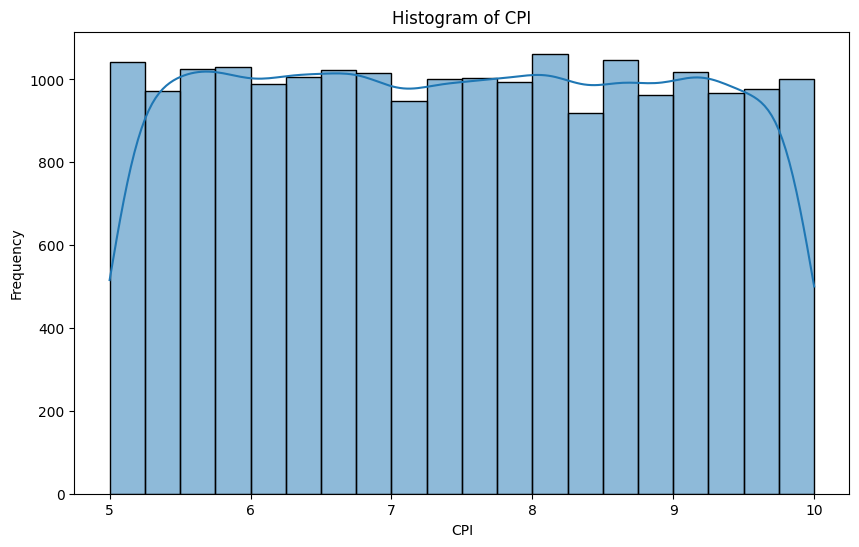

In [24]:
# Perform basic EDA
# Histogram of CPI
plt.figure(figsize=(10, 6))
sns.histplot(sample_data['CPI'], bins=20, kde=True)
plt.title('Histogram of CPI')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.show()

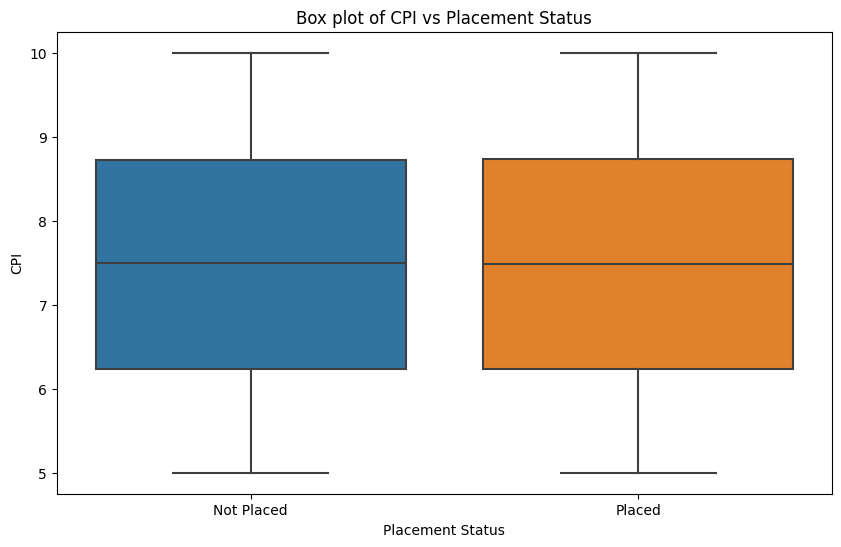

In [25]:
# Box plot of CPI vs Placement Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Placement Status', y='CPI', data=sample_data)
plt.title('Box plot of CPI vs Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('CPI')
plt.show()

In [26]:
# Generate pandas profiling report
profile = ProfileReport(sample_data, title="Pandas Profiling Report")
profile.to_file("Placemeant_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:  62%|██████▏   | 8/13 [00:01<00:00,  8.33it/s, Calculate auto correlation]        C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'No Company'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 200.07it/s]


In [27]:
sample_data.drop(columns="Student Name",axis=1,inplace=True)

In [28]:
X = sample_data[['CPI', 'Skillset']]
y_status = sample_data['Placement Status'].apply(lambda x: 1 if x == 'Placed' else 0)
y_salary = sample_data['Salary offered'] 

In [29]:
# Convert skillset into dummy variables
skills_dummies = X['Skillset'].str.get_dummies(sep=', ')
X.drop(columns=['Skillset'], inplace=True)
X = pd.concat([X, skills_dummies], axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14832\2750782888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Skillset'], inplace=True)


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train_status, y_test_status = train_test_split(X, y_status, test_size=0.2, random_state=42)

X_train, X_test, y_train_salary, y_test_salary = train_test_split(X, y_salary, test_size=0.2, random_state=42)

In [31]:
regression_model = RandomForestRegressor()
regression_model.fit(X_train, y_train_salary)

RandomForestRegressor()

In [32]:
# Train the RandomForestClassifier model
classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
classification_model.fit(X_train, y_train_status)

RandomForestClassifier(random_state=42)

In [33]:
# Predict placement status
y_pred = classification_model.predict(X_test)

In [34]:
# Measure accuracy and precision
accuracy = accuracy_score(y_test_status, y_pred)
precision = precision_score(y_test_status, y_pred)

In [35]:
print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.498
Precision: 0.48473684210526313


In [36]:
salary_mse = mean_squared_error(y_test_salary, regression_model.predict(X_test))
print("Mean Squared Error for salary prediction:", salary_mse)

Mean Squared Error for salary prediction: 129672931921.73787


In [39]:
salary_R2 = r2_score(y_test_salary, regression_model.predict(X_test))

print("R2 score for salary: ", salary_R2)

R2 score for salary:  -0.10927585448912192


In [37]:
# Function to predict placement status based on CPI and skills
def predict_placement(cpi, skills):
    skills_list = skills.split(', ')
    skills_dummy = pd.DataFrame(columns=skills_dummies.columns, data=np.zeros((1, len(skills_dummies.columns))))
    for skill in skills_list:
        if skill in skills_dummy.columns:
            skills_dummy[skill] = 1
    input_data = pd.DataFrame({'CPI': [cpi]})
    input_data = pd.concat([input_data, skills_dummy], axis=1)
    placement_status_prediction = classification_model.predict(input_data)
    placement_salary_prediction = regression_model.predict(input_data)
    if placement_status_prediction[0] == 1:
        print("Predicted Placement Salary:", placement_salary_prediction[0])
    else:
        placement_salary_prediction = "0"
        print("Predicted Placement Salary:", placement_salary_prediction[0])
    if placement_status_prediction[0] == 1:
        return "Placed"
    else:
        return "Not Placed"


In [38]:
test_cpi = float(input("Enter the CPI: "))
test_skills = input("Enter the skills (comma-separated): ")

prediction = predict_placement(test_cpi, test_skills)
print("Prediction for CPI", test_cpi, "and skills", test_skills, ":", prediction)


Predicted Placement Salary: 0
Prediction for CPI 7.5 and skills Java : Not Placed
